# Introduction
Following notebook contains in-depth Exploratory Data Analysis for better understanding of data followed by building machine learning models. Please upvote my work if you like it and leave a comment regarding the improvements that can be done to enhance the predictions.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
dataset=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

# Exploratory Data Analysis

* Let's check the column names

In [4]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* Also the column types

In [5]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

* Changing the target variable name

In [6]:
dataset['Admit_rate']=dataset['Chance of Admit ']

In [7]:
dataset=dataset.drop('Chance of Admit ', axis=1)

Let's see the distribution of the target variable

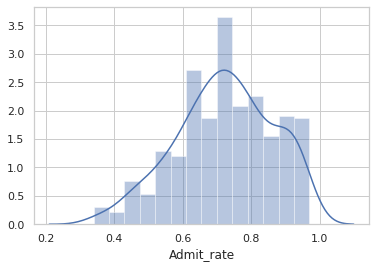

In [8]:
sns.set(style="whitegrid")
sns.distplot(dataset['Admit_rate'])

1. It has pretty much normal distribution, now what about outliers

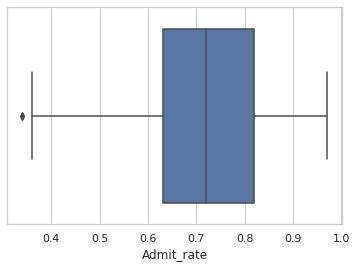

In [9]:
sns.boxplot(dataset['Admit_rate'])

There are some outliers, we will handle them during data pre-processing

Let's check the relationship of features with target variable

Sequence will be:
1. GRE Score
2. TOEFL Score
3. University Rating
4. SOP
5. LOR
6. CGPA
7. Research

I have some initial intuition about this data.
Chances of Admit will increase if we increase the values of following variables:
1. GRE Score
2. TOEFL Score
3. SOP
4. LOR
5. CGPA
6. Research

As the University rating increases, we can assume that competition will increase between students and hence the chances of Admit will go down. Now we will try to confirm this intuition.

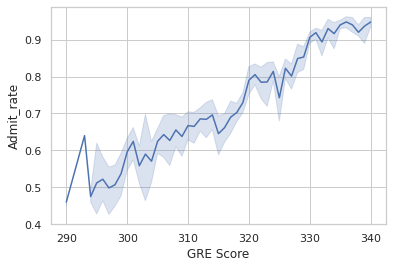

In [10]:
sns.lineplot(x=dataset['GRE Score'], y=dataset['Admit_rate'])

So our intution regrading GRE scores was true! As the scores increase, chances of Admit increases as well.

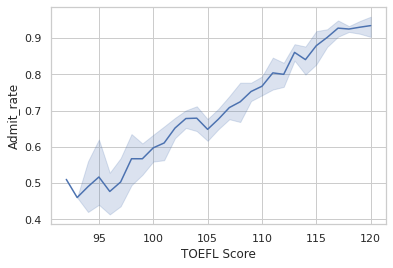

In [11]:
sns.lineplot(x=dataset['TOEFL Score'], y=dataset['Admit_rate'])

Same is the scenario with TOEFL scores

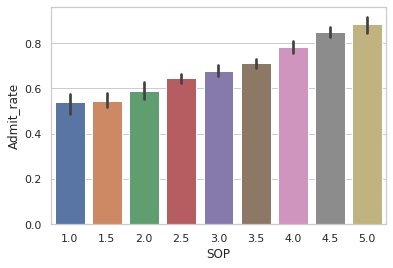

In [12]:
sns.barplot(x=dataset['SOP'], y=dataset['Admit_rate'])

* As the quality of SOP increases, the chances of Admit also increases

In [13]:
dataset['LOR']=dataset['LOR ']
dataset=dataset.drop('LOR ', axis=1)

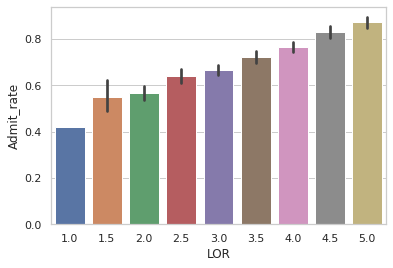

In [14]:
sns.barplot(x=dataset['LOR'], y=dataset['Admit_rate'])

So as the quality of Letter of Recommendation increases, chances of Admit also increases. So far our inuition is correct. Let's check for remaining variables.

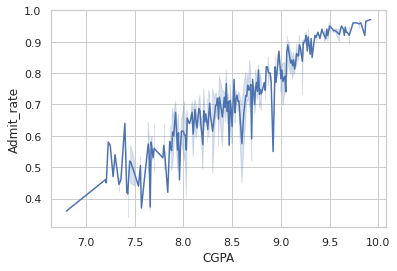

In [15]:
sns.lineplot(x=dataset['CGPA'], y=dataset['Admit_rate'])

Overall trend is increasing but there are a lot of fluctuations. It shows that high CGPA does not always mean high chances of Admit.

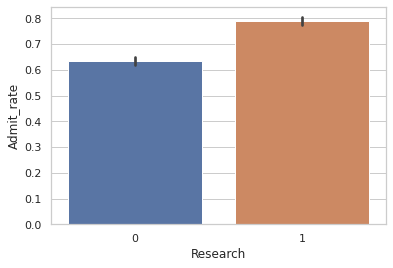

In [16]:
sns.barplot(x=dataset['Research'], y=dataset['Admit_rate'])

Again, with research experirence, chances are that an aspirant will get an admit from the University.

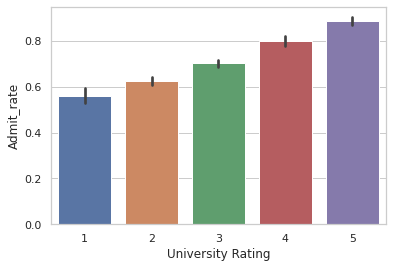

In [17]:
sns.barplot(x=dataset['University Rating'], y=dataset['Admit_rate'])

* So this variable shows opposite of our expectations. It is because the University rating is of the University in which the aspirant has done his/her Undergraduate degree. Obviously, if you have done your Undergrad from some reputed University, then your chance of Admit will also increase.

* So far our data has a linear relationship with the target variable. Let's do some complex visualisations to understand the data better

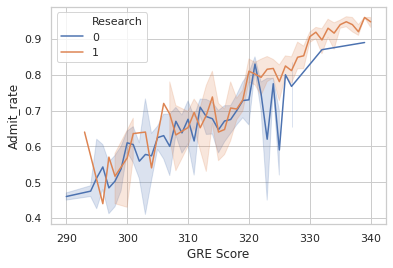

In [18]:
sns.lineplot(x=dataset['GRE Score'], y=dataset['Admit_rate'], hue=dataset['Research'])

Even if you have high GRE scores, having no research experience will definitely be a hinder your chances of getting an admit.

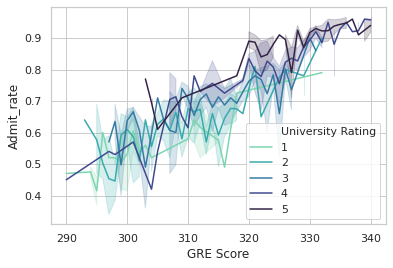

In [19]:
palette = sns.color_palette("mako_r", 5)
sns.lineplot(x=dataset['GRE Score'], y=dataset['Admit_rate'], hue=dataset['University Rating'],palette=palette, legend="full")

With respect to University Ratings of an aspirant, it affects the chances of admit in following ways:
1. For aspirants with low GRE score, higher University Ratings are definitely as plus point.
2. As the GRE score increases, the affect of University ratings on the chances of Admit also decreases.

Based on the insights, it is safe to say that aspirants with lower University ranking should aim for a higher GRE score in order to get an admit.

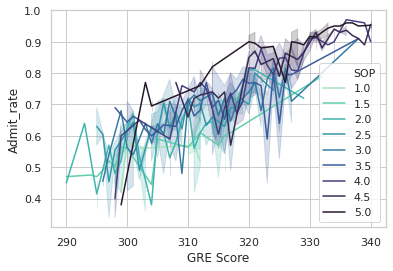

In [20]:
palette = sns.color_palette("mako_r", 9)
sns.lineplot(x=dataset['GRE Score'], y=dataset['Admit_rate'], hue=dataset['SOP'],  palette=palette,legend="full")

Following insights can be drawn from this:
1. Low rated SOPs combined with Low GRE scores will definitely affect your chances of Admit.
2. High GRE scores can cover up for average or even low rated SOPs.

GRE scores are a lot more important for aspirants who have a weak SOP and University rankings.

Now an important question. 
Can high GRE scores cover up for low CGPA and vice-versa? 
Let's check it out!

So for better understanding, we will be creating bins for CGPA in following manner:
1. Category 1 for High CGPA
2. Category 2 for Average CGPA
3. Category 3 for low CGPA

In [21]:
dataset['CGPA_cat']=0

In [22]:
temp = [dataset]

In [23]:
for data in temp:
    data.loc[dataset['CGPA']<=8,'CGPA_cat']=3,
    data.loc[(dataset['CGPA']>8) & (dataset['CGPA']<=9),'CGPA_cat']=2,
    data.loc[(dataset['CGPA']>9) & (dataset['CGPA']<=10),'CGPA_cat']=1
    

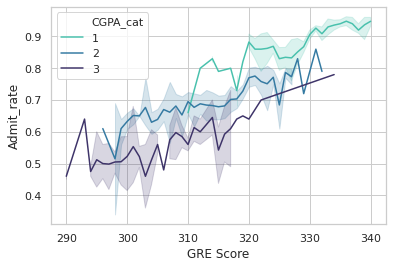

In [24]:
palette = sns.color_palette("mako_r", 3)
sns.lineplot(x=dataset['GRE Score'], y=dataset['Admit_rate'], hue=dataset['CGPA_cat'], palette=palette, legend="full")

As shown, High GRE scores cannot cover up for high cgpa as the difference between aspirants with same GRE scores but different CGPA is clearly visible.

TOEFL Scores

We will be doing a similar kind of analysis for TOEFL scores category.

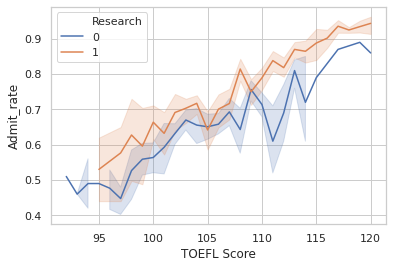

In [25]:
sns.lineplot(x=dataset['TOEFL Score'], y=dataset['Admit_rate'], hue=dataset['Research'])

* Aspirant with no research experience is at clear cut disadvantage incomparison to the one having a research background. This insight is useful for those aspirants who are trying to get into universities which do not accept GRE.

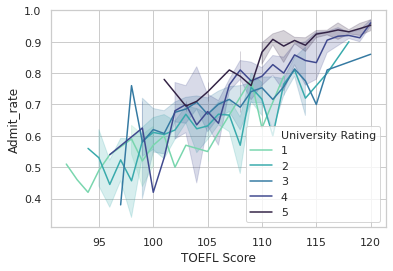

In [26]:
palette = sns.color_palette("mako_r", 5)
sns.lineplot(x=dataset['TOEFL Score'], y=dataset['Admit_rate'], hue=dataset['University Rating'],palette=palette, legend="full")

Aspirants with low University ratings will have low chances of admit in comparison to the ones from higher ranking Universities. This gap is less when TOEFL scores are less but it increases significantly when TOEFL score increases.

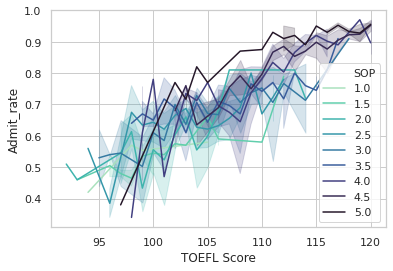

In [27]:
palette = sns.color_palette("mako_r", 9)
sns.lineplot(x=dataset['TOEFL Score'], y=dataset['Admit_rate'], hue=dataset['SOP'],  palette=palette,legend="full")

TOEFL scores seems to be covering up for low rated SOPs.

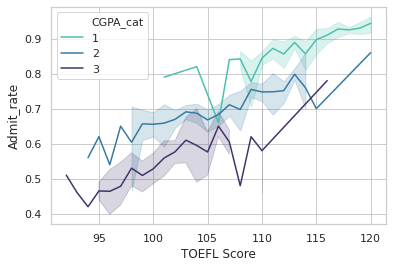

In [28]:
palette = sns.color_palette("mako_r", 3)
sns.lineplot(x=dataset['TOEFL Score'], y=dataset['Admit_rate'], hue=dataset['CGPA_cat'],palette=palette, legend="full")

Higher CGPA students again have a clear cut advantage when compared to aspirants with lower CGPA. Even high TOEFL scores cannot bridge the gap.

# Data Pre-processing

Here, we will check for missing values, covert categorical variables(since we have all variables in number for so no need) and do some feature engineering if necessary.

Let's check for missing values

In [29]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
CGPA                 0
Research             0
Admit_rate           0
LOR                  0
CGPA_cat             0
dtype: int64

No missing values. Let's check the correlation between variables and plot a heatmap.

In [30]:
dataset2=dataset.drop("Serial No.", axis=1)

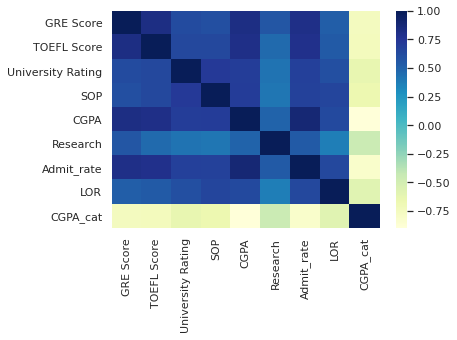

In [31]:
corr=dataset2.corr()
sns.heatmap(corr, cmap="YlGnBu")

Let's make a better version of this

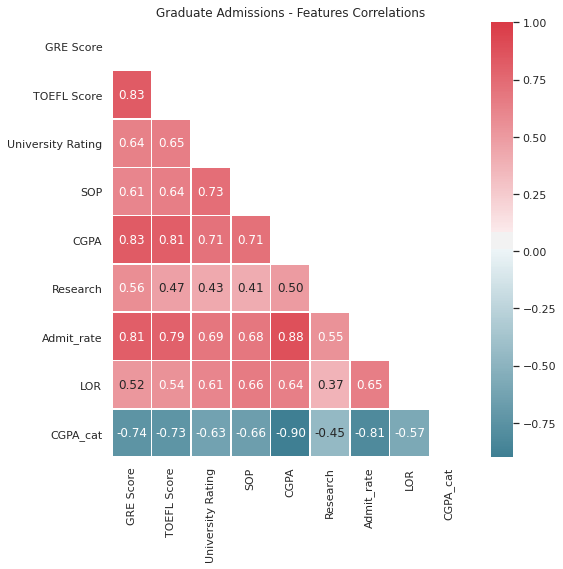

In [32]:
corr = dataset2.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Graduate Admissions - Features Correlations')
plt.show()

In [33]:
print (corr['Admit_rate'].sort_values(ascending=False)[:10], '\n') #top 15 values



Admit_rate           1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
CGPA_cat            -0.813322
Name: Admit_rate, dtype: float64 



CGPA is 88% correlated with Admit chances while CGPA categorical is negatively correlated. It is because I have created bins in reverse order.
In case you have questions about correlations, click on this link-
https://www.displayr.com/what-is-correlation/


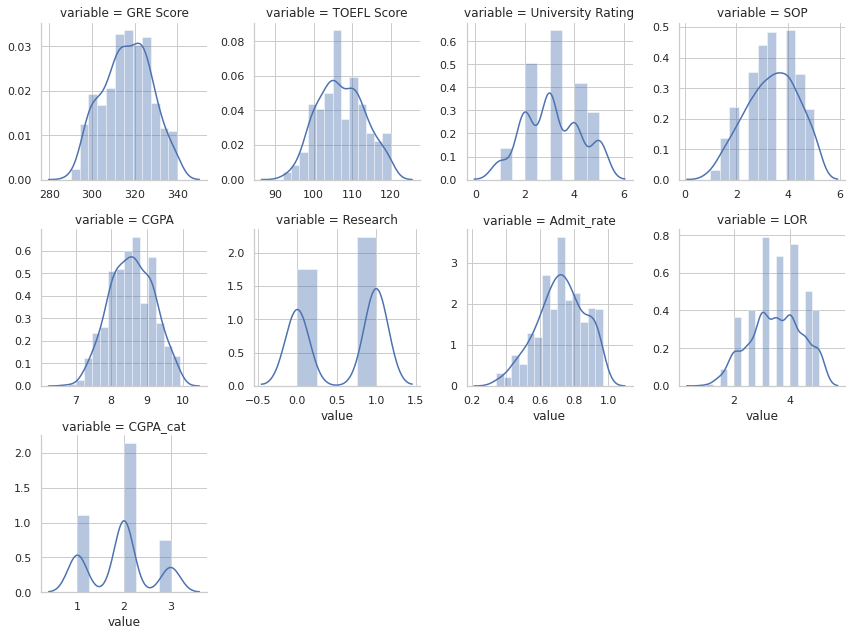

In [34]:
num = [f for f in dataset2.columns if ((dataset2.dtypes[f] != 'object')& (dataset2.dtypes[f]!='bool'))]

nd = pd.melt(dataset2, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

Now we will split dataset into train and target variables

In [35]:
target=dataset['Admit_rate']

In [36]:
drop=['Serial No.', 'Admit_rate','CGPA_cat']
train = dataset.drop(drop, axis=1)

Now it is time to build model.

# Model Implementation
We will be implementing both Tree and non-Tree based models to compare the performance

### Tree Based
1. XGBoost

### Non-Tree Based
1. Lasso Regression
2. Linear Regression

# Score
To measure the performance of our model, we will be calculating a score out of 100 using the formula
#### Score = 100 * (0 , 1 - root_mean_squared_error(actual values, predicted values)

In [37]:
#Now we will split the dataset in the ratio of 75:25 for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.25, random_state = 0)

## XGBoost Regressor

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=1000,learning_rate=0.05,n_jobs=-1)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))
    

y_pred = model.predict(X_test)
print("XGBoost Regressor MSE on testing set: ", mean_squared_error(y_test, y_pred))
print("XGBoost Regressor RMSE on testing set: ", rmse(y_test, y_pred))

print("XGBoost Regressor Score: {}".format(100*max(0,1-(rmse(y_test,y_pred)))))

XGBoost Regressor MSE on testing set:  0.00396906096026711
XGBoost Regressor RMSE on testing set:  0.06300048380978601
XGBoost Regressor Score: 93.6999516190214


* Making scatter plot between actual and predicted points to see the model performance visually.

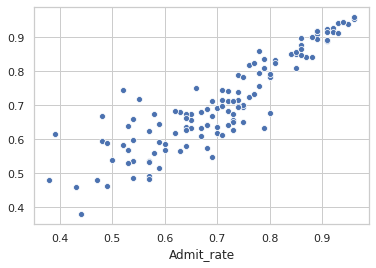

In [40]:
sns.scatterplot(y_test,y_pred)

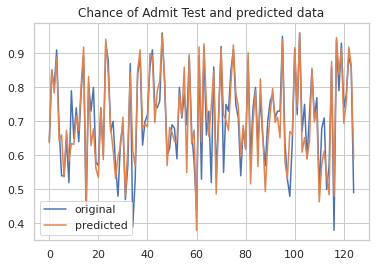

In [41]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Chance of Admit Test and predicted data")
plt.legend()
plt.show()

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
best_alpha = 0.0099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)

Lasso(alpha=0.0099, max_iter=50000)

In [44]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))
y_pred = regr.predict(X_test)
print("Lasso Regressor MSE on testing set: ", mean_squared_error(y_test, y_pred))
print("Lasso Regressor RMSE on testing set: ", rmse(y_test, y_pred))
print("Lasso Regressor Score: {}".format(100*max(0,1-(rmse(y_test,y_pred)))))

Lasso Regressor MSE on testing set:  0.0041303133194035375
Lasso Regressor RMSE on testing set:  0.06426751371730151
Lasso Regressor Score: 93.57324862826985


* Making scatter plot between actual and predicted points to see the model performance visually.

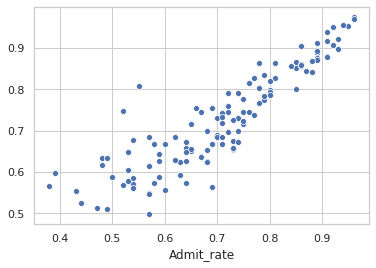

In [45]:
sns.scatterplot(y_test,y_pred)

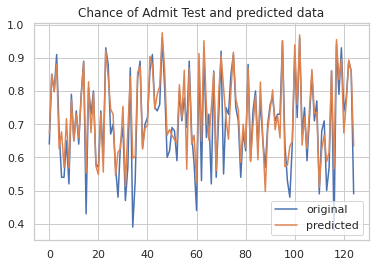

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Chance of Admit Test and predicted data")
plt.legend()
plt.show()

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

y_pred = lr.predict(X_test)
print("Linear Regressor MSE on testing set: ", mean_squared_error(y_test, y_pred))
print("Linear Regressor RMSE on testing set: ", rmse(y_test, y_pred))
print("Linear Regressor Score: {}".format(100*max(0,1-(rmse(y_test,y_pred)))))

Linear Regressor MSE on testing set:  0.004169676773902697
Linear Regressor RMSE on testing set:  0.06457303441764757
Linear Regressor Score: 93.54269655823524


* Making scatter plot between actual and predicted points to see the model performance visually.

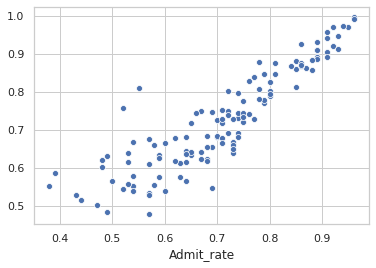

In [49]:
sns.scatterplot(y_test,y_pred)

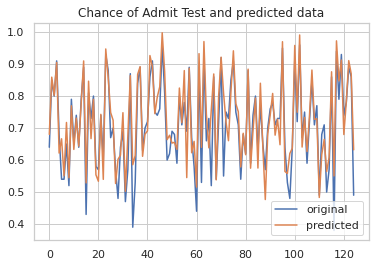

In [50]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Chance of Admit Test and predicted data")
plt.legend()
plt.show()

# Conclusion

With highest score of 93.69, XGBoost is performing the best for this dataset. We can using hyperparameter tuning with the help of GridSearchCV and further use ensemble methods to improve our score.